In [115]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import svm

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [27]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.shape

(891, 12)

In [4]:
#pandas_profiling.ProfileReport(df_train)

In [5]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [60]:
#missing data
total = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Count_Missing', 'Percent_Missing'])
missing_data.head(20)

,Count_Missing,Percent_Missing
Cabin,327,0.782297
Embarked,0,0.000000
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Age,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df_train.drop(['PassengerId'],axis= 1,inplace=True)
df_test.drop(['PassengerId'],axis= 1,inplace=True)

In [12]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [48]:
le = preprocessing.LabelEncoder()
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_test['Sex'] = le.fit_transform(df_test['Sex'])

In [14]:
le.classes_ # female = 0 and male = 1

array(['female', 'male'], dtype=object)

In [15]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df_train[df_train['Embarked'].isnull()==True].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN


In [86]:
df_train['Embarked'].fillna('S',inplace=True)
df_test['Embarked'].fillna('S',inplace=True)
df_train['Fare'].fillna(df_train['Fare'].mean,inplace=True)
df_test['Fare'].fillna(df_test['Fare'].mean,inplace=True)

In [18]:
#df_train['Age'] = pd.to_numeric(df_train['Age'],errors='coerce')
#df_test['Age'] =  pd.to_numeric(df_test['Age'],errors='coerce')

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int32
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 73.2+ KB


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null int32
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    891 non-null object
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 73.2+ KB


In [21]:
df_train.groupby('Embarked').size()

Embarked
C    168
Q     77
S    646
dtype: int64

In [43]:
df_train['Embarked'] = le.fit_transform(df_train['Embarked'])
df_test['Embarked'] = le.fit_transform(df_test['Embarked'])

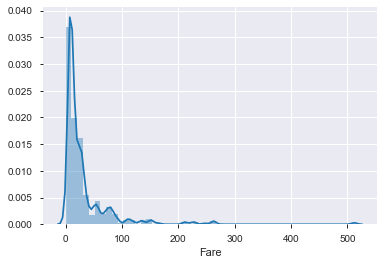

In [36]:
sns.distplot(df_train['Fare'])

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)


ZeroDivisionError: division by zero

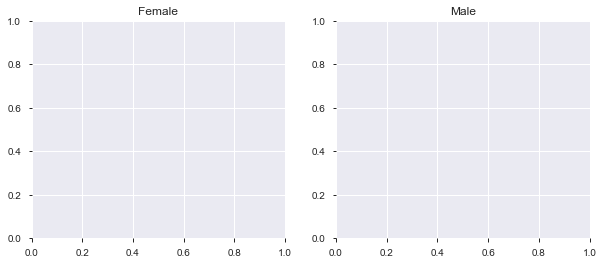

In [40]:

# female = 0 and male = 1
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,4))
#plt.figure(1)
ax1.set_title('Female')
ax2.set_title('Male')

sns.distplot(df_train[(df_train.Survived==1) & (df_train.Sex==0)]['Age'].dropna(),ax=ax1,bins=18,label = 'Survived',kde=False)
sns.distplot(df_train[(df_train.Survived==0) & (df_train.Sex==0)]['Age'].dropna(),ax=ax1,bins=40,label = 'Not Survived',kde=False)

sns.distplot(df_train[(df_train.Survived==1) & (df_train.Sex==1)]['Age'].dropna(),ax=ax2,bins=18,label = 'Survived',kde=False)
sns.distplot(df_train[(df_train.Survived==0) & (df_train.Sex==1)]['Age'].dropna(),ax=ax2,bins=40,label = 'Not Survived',kde=False)

ax1.legend()
ax2.legend()

In [ ]:
df_test.head()

In [87]:
cols = ['Pclass', 'Sex', 'SibSp',
       'Parch', 'Embarked']

X_train = df_train[cols] #.drop('Survived',axis=1)
Y_train = df_train['Survived']
X_test = df_test[cols] #.drop('Survived',axis=1)
Y_test = df_test['Survived']

In [88]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [110]:
y_pred = logreg.predict(X_test)
acc_LR = round(logreg.score(X_train,Y_train)*100,2)
print(acc_LR)

acc_LR1 = round(logreg.score(X_test,Y_test)*100,2)
acc_LR1

80.02


99.28

In [96]:
logreg.coef_[0]

array([-0.80743215, -2.52833517, -0.20060375, -0.01553973, -0.20847247])

In [111]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
acc_knn = round(knn.score(X_train,Y_train)*100,2)
print(acc_knn)


acc_knn1 = round(knn.score(X_test,Y_test)*100,2)
acc_knn1

82.15


87.08

In [116]:
svc = svm.SVC()
svc.fit(X_train,Y_train)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
print(acc_svc)


acc_svc1 = round(svc.score(X_test,Y_test)*100,2)
acc_svc1

81.37


97.37

In [120]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)
acc_dtree = round(dtree.score(X_train,Y_train)*100,2)
print(acc_dtree)


acc_dtree1 = round(dtree.score(X_test,Y_test)*100,2)
acc_dtree1

83.73


86.36

In [125]:
dtreeRand = RandomForestClassifier()
dtreeRand.fit(X_train,Y_train)
acc_dtreeRand = round(dtreeRand.score(X_train,Y_train)*100,2)
print(acc_dtreeRand)


acc_dtreeRand1 = round(dtreeRand.score(X_test,Y_test)*100,2)
acc_dtreeRand1

83.61


87.08

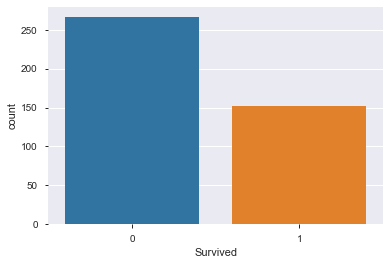

In [131]:
sns.countplot(Y_test)

In [132]:
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
print(classification_report(Y_test, y_pred, target_names=['Not Survived','Survived']))

accuracy_score()

              precision    recall  f1-score   support

Not Survived       0.99      1.00      0.99       266
    Survived       1.00      0.98      0.99       152

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418



In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[266,   0],
       [  3, 149]], dtype=int64)

In [136]:
pd.DataFrame(Y_test,y_pred,columns=['Test','Predicted'])

,Test,Predicted
0,NaN,NaN
1,NaN,NaN
0,NaN,NaN
0,NaN,NaN
1,NaN,NaN
...,...,...
0,NaN,NaN
1,NaN,NaN
0,NaN,NaN
0,NaN,NaN


In [ ]:
X_train.info()

In [ ]:
def squarefunc(num):
    return num*num

a = [1,2,3]

apply(squarefunc)